**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 9**

**Problem 9.12**


**Use pvlib and the Typical Meteorological Year (TMY) to calculate the reference yield $Y_R$, array yield $Y_A$, and final yield $Y_F$, for a small rooftop PV system installed in Cairo, Egypt (31.233$^{\circ}$N, 30.033$^{\circ}$E). The system includes one PV panel LG290N1C (oriented towards the south with inclination angle $\beta=20^{\circ}$) and one microinverter ABB-MICRO-0.25. For the cell temperature estimation, assume that the PV module is glass-glass and it is mounted on an open rack.**

**In addition, estimate the capture losses $L_C$, the systems losses $L_S$ and the performance ratio $PR$.**

We will use the packages [pvlib](https://pvlib-python.readthedocs.io/en/stable/), [pandas](https://pandas.pydata.org/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results. We will also use the package [pytz](https://pypi.org/project/pytz/) to determine the time zone of Egypt.

In [1]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt
import pytz

We start by defining the location, date, and time. We also define the orientation and tilt angles.

In [2]:
# Cairo, Egypt
lat, lon =  31.233, 30.033
altitude = 23

tz = pytz.country_timezones('EG')[0] # timezone corresponding to country 'EG' (Egypt)

# location
location = pvlib.location.Location(lat, lon, tz=tz)

orientation = 180 # pvlib sets orientation origin at North -> South=180
tilt = 20

We retrieve typical meteorological year (TMY) data from PVGIS.

In [3]:
tmy, _, _, _ = pvlib.iotools.get_pvgis_tmy(latitude=lat, longitude=lon, map_variables=True)

tmy.index = tmy.index.tz_convert(tz) # use local time

We retrieve the PV modules and inverter specifications from the database at the [NREL SAM (System Advisory Monitoring)](https://sam.nrel.gov/). 

In [4]:
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod') 
module = sandia_modules['LG_LG290N1C_G3__2013_'] # module LG290N1C

# Alternatively, the CEC modules database can be retrived, but this does not include all the parameters needed to use 
# the SAMP (Sandia PV Array Peformance) Model
# sam_modules = pvlib.pvsystem.retrieve_sam('CECMod') 
# module = sam_modules['LG_Electronics_Inc__LG345N1W_A5'] # module LG345N1W-A5

sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_'] # inverter ABB-MICRO-0.25

We can check the different modules and inverters included in the SAM database, as well as their properties.

In [5]:
sandia_modules

,Advent_Solar_AS160___2006_,Advent_Solar_Ventura_210___2008_,Advent_Solar_Ventura_215___2009_,Aleo_S03_160__2007__E__,Aleo_S03_165__2007__E__,Aleo_S16_165__2007__E__,Aleo_S16_170__2007__E__,Aleo_S16_175__2007__E__,Aleo_S16_180__2007__E__,Aleo_S16_185__2007__E__,...,Panasonic_VBHN235SA06B__2013_,Trina_TSM_240PA05__2013_,Hanwha_HSL60P6_PA_4_250T__2013_,Suniva_OPT300_72_4_100__2013_,Canadian_Solar_CS6X_300M__2013_,LG_LG290N1C_G3__2013_,Sharp_NDQ235F4__2013_,Solar_Frontier_SF_160S__2013_,SolarWorld_Sunmodule_250_Poly__2013_,Silevo_Triex_U300_Black__2014_
Vintage,2006,2008,2009,2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2014
Area,1.312,1.646,1.646,1.28,1.28,1.378,1.378,1.378,1.378,1.378,...,1.26,1.63,1.65,1.93,1.91,1.64,1.56,1.22,1.68,1.68
Material,mc-Si,mc-Si,mc-Si,c-Si,c-Si,mc-Si,mc-Si,mc-Si,mc-Si,mc-Si,...,a-Si / mono-Si,mc-Si,mc-Si,c-Si,c-Si,c-Si,mc-Si,CIS,mc-Si,c-Si
Cells_in_Series,72,60,60,72,72,50,50,50,50,50,...,72,60,60,72,72,60,60,172,60,96
Parallel_Strings,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Isco,5.564,8.34,8.49,5.1,5.2,7.9,7.95,8.1,8.15,8.2,...,5.8738,8.8449,8.5935,8.5753,8.6388,9.8525,8.6739,2.0259,8.3768,5.771
Voco,42.832,35.31,35.92,43.5,43.6,30.0,30.1,30.2,30.3,30.5,...,52.0042,36.8926,36.8075,44.2921,43.5918,39.6117,36.8276,112.5048,36.3806,68.5983
Impo,5.028,7.49,7.74,4.55,4.65,7.08,7.23,7.38,7.53,7.67,...,5.5383,8.2955,8.0822,7.963,8.1359,9.2473,8.1243,1.8356,7.6921,5.383
Vmpo,32.41,27.61,27.92,35.6,35.8,23.3,23.5,23.7,23.9,24.1,...,43.1204,29.066,29.2011,35.0837,34.9531,31.2921,29.1988,86.6752,28.348,55.4547
Aisc,0.000537,0.00077,0.00082,0.0003,0.0003,0.0008,0.0008,0.0008,0.0008,0.0008,...,0.0005,0.0004,0.0004,0.0006,0.0005,0.0002,0.0006,0.0001,0.0006,0.0003


In [6]:
sapm_inverters

,ABB__MICRO_0_25_I_OUTD_US_208__208V_,ABB__MICRO_0_25_I_OUTD_US_240__240V_,ABB__MICRO_0_3_I_OUTD_US_208__208V_,ABB__MICRO_0_3_I_OUTD_US_240__240V_,ABB__MICRO_0_3HV_I_OUTD_US_208__208V_,ABB__MICRO_0_3HV_I_OUTD_US_240__240V_,ABB__PVI_10_0_I_OUTD_x_US_208_y__208V_,ABB__PVI_10_0_I_OUTD_x_US_480_y_z__480V_,ABB__PVI_12_0_I_OUTD_x_US_480_y__480V_,ABB__PVI_3_0_OUTD_S_US__208V_,...,Zigor__Sunzet_3_TL_US__240V_,i_Energy__GT260__240V_,iPower__SHO_1_1__120V_,iPower__SHO_2_0__240V_,iPower__SHO_2_5__240V_,iPower__SHO_3_0__240V_,iPower__SHO_3_5__240V_,iPower__SHO_4_6__208V_,iPower__SHO_4_8__240V_,iPower__SHO_5_2__240V_
Vac,208,240,208,240,208,240,208,480,480,208,...,240,240,120,240,240,240,240,208,240,240
Pso,2.089607,2.240412,1.846506,1.950539,1.769444,1.843781,46.863808,67.790878,62.554672,18.166279,...,36.033405,2.530101,22.09536,24.465775,42.776474,31.682003,64.774162,54.570091,85.145699,62.486748
Paco,250.0,250.0,300.0,300.0,300.0,300.0,10000.0,10000.0,12000.0,3000.0,...,3180.0,230.0,1100.0,2000.0,2500.0,3000.0,3500.0,4600.0,4800.0,5200.0
Pdco,259.588593,259.492065,311.66925,311.580872,312.421082,312.004578,10488.306641,10295.979492,12358.804688,3142.30127,...,3315.654297,245.630447,1194.094849,2161.879639,2632.835693,3205.932617,3641.840332,4797.806641,4968.027832,5382.856934
Vdco,40.0,40.0,40.0,40.0,45.0,45.0,320.0,362.0,370.0,310.0,...,375.0,40.0,182.0,199.0,218.0,222.5,263.0,254.0,263.0,280.0
C0,-0.000041,-0.000039,-0.000033,-0.000034,-0.000045,-0.000035,-0.000003,-0.000001,-0.000001,-0.000008,...,-0.000008,0.000062,-0.000021,-0.000013,-0.000014,-0.000008,-0.000009,-0.000006,-0.000006,-0.000005
C1,-0.000091,-0.000132,-0.000192,-0.000256,-0.000196,-0.000227,-0.000036,-0.000049,-0.000056,-0.000011,...,-0.000075,-0.000098,0.000057,0.000055,0.000061,0.000036,0.000035,0.000028,0.000034,0.000044
C2,0.000494,0.002418,0.000907,0.002453,0.001959,-0.000526,0.000305,-0.00052,-0.001437,0.000999,...,0.000544,0.000231,0.002001,0.001703,0.002053,0.001708,0.001417,0.001381,0.000586,0.00126
C3,-0.013171,-0.014926,-0.031742,-0.028223,-0.023725,-0.041214,-0.002351,-0.003855,-0.007112,-0.000287,...,-0.000338,0.121032,0.000623,0.000315,0.00153,0.00086,0.001218,0.000889,0.000195,0.000367
Pnt,0.075,0.075,0.09,0.09,0.09,0.09,0.1,0.4,0.4,0.1,...,0.954,0.069,0.33,0.6,0.75,0.9,1.05,1.38,1.44,1.56


For the temperature parameters, we assume an open rack glass-glass configuration.

In [7]:
temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

We calculate the Sun's coordinates and the irradiance on the plane of array (POA).

In [8]:
# calculate Sun's coordinates
solar_position = location.get_solarposition(times=tmy.index)

# calculate irradiante at the plane of the array (poa)
poa_irradiance = pvlib.irradiance.get_total_irradiance(surface_tilt=tilt,
                                                       surface_azimuth=orientation,
                                                       dni=tmy['dni'],
                                                       ghi=tmy['ghi'],
                                                       dhi=tmy['dhi'],
                                                       solar_zenith=solar_position['apparent_zenith'],
                                                       solar_azimuth=solar_position['azimuth'])

The reference yield can be estimated as the sum of the irradiance on the plane of the array. 

In [9]:
Y_R=0.001*poa_irradiance['poa_global'].sum() # Wh->kWh
print('Reference Yield = '+str(Y_R.round(1)) + ' kWh')

Reference Yield = 2213.4 kWh


We calculate now the effective irradiance, for which we need to estimate the air mass and the angle of incidence (AOI).

In [10]:
#calculate airmass 
airmass = pvlib.atmosphere.get_relative_airmass(solar_position['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
    
#calculate the angle of incidence (aoi)
aoi = pvlib.irradiance.aoi(surface_tilt=tilt,
                           surface_azimuth=orientation,                              
                           solar_zenith=solar_position['apparent_zenith'],
                           solar_azimuth=solar_position['azimuth'])

effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(poa_irradiance['poa_direct'],
                                                                poa_irradiance['poa_diffuse'],
                                                                am_abs,
                                                                aoi,
                                                                module)

We calculate the DC power generation of the system, the array yield $Y_A$, and the capture losses.

In [12]:
# calculate the solar cell temperature
cell_temperature = pvlib.temperature.sapm_cell(poa_irradiance['poa_global'],
                                               tmy["temp_air"],
                                               tmy["wind_speed"],
                                               **temperature_model_parameters,)

#calculate the DC generation in every hour
dc_power = pvlib.pvsystem.sapm(effective_irradiance, cell_temperature, module)

P_STC=module['Impo']*module['Vmpo']

Y_A = dc_power['p_mp'].sum()/P_STC 
L_C = 1-Y_A/Y_R

print('Array Yield, Y_A = '+str(Y_A.round(1)) + ' kWh')
print('Capture Losses, L_C = '+str(100*L_C.round(2))+ ' %')

Array Yield, Y_A = 1986.5 kWh
Capture Losses, L_C = 10.0 %


We calculate the AC power generation of the system, the final yield, the system losses, and the performance ratio.

In [13]:
ac_power = pvlib.inverter.sandia(dc_power['v_mp'], dc_power['p_mp'], inverter)

Y_F = ac_power.sum()/P_STC 

L_S=1-Y_F/Y_A

PR=Y_F/Y_R

print('Final Yield, Y_F = '+str(Y_F.round(1))+ ' kWh')
print('System Losses, L_S = '+str(100*L_S.round(2))+ ' %')
print('Performance Ratio, PR = '+str(100*PR.round(2))+ ' %')

Final Yield, Y_F = 1904.6 kWh
System Losses, L_S = 4.0 %
Performance Ratio, PR = 86.0 %


We can also plot the ac power vs the irradiance and use the color plot to represent the cell temperature.

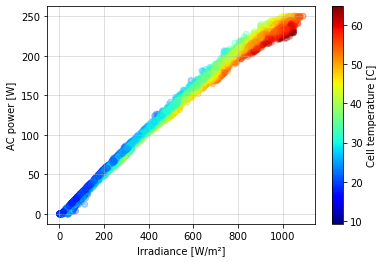

In [14]:
plt.figure()
pc = plt.scatter(poa_irradiance['poa_global'], ac_power, c=cell_temperature, cmap='jet')
plt.colorbar(label='Cell temperature [C]', ax=plt.gca())
pc.set_alpha(0.3)
plt.grid(alpha=0.5)
plt.xlabel('Irradiance [W/m²]')
plt.ylabel('AC power [W]')
plt.show()

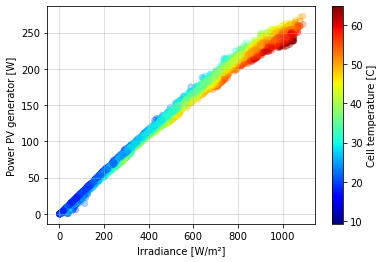

In [15]:
plt.figure()
pc = plt.scatter(poa_irradiance['poa_global'], dc_power['p_mp'], c=cell_temperature, cmap='jet')
plt.colorbar(label='Cell temperature [C]', ax=plt.gca())
pc.set_alpha(0.3)
plt.grid(alpha=0.5)
plt.xlabel('Irradiance [W/m²]')
plt.ylabel('Power PV generator [W]')
plt.show()